In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
train= pd.read_csv('train.csv')

# EDA

In [3]:
# identification of variable
train.dtypes

customer_id                      object
Name                             object
age                               int64
gender                           object
security_no                      object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64


In [4]:
# Here joining date is in object type we have to convert it to datetime type and 
#last visit time is also we need to convert

In [5]:
def shape_data(df):
    rows,columns= df.shape
    print('The numbers of rows',rows,'rows')
    print('the numbers of columns',columns,'columns')

In [6]:
shape_data(train)

The numbers of rows 36992 rows
the numbers of columns 25 columns


In [7]:
# statistical summary of data
train.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [8]:
# non graphicsl univariate analysis
for i in train.columns:
    print(train[i].value_counts())
    print('-----------------------------------------') 

fffe43004900440033003300340034003400    1
fffe43004900440034003400390031003300    1
fffe4300490044003800350031003800        1
fffe43004900440031003200300037003800    1
fffe4300490044003200390038003500        1
                                       ..
fffe43004900440035003600360030003100    1
fffe43004900440031003100330038003700    1
fffe43004900440031003300380036003300    1
fffe4300490044003300320037003600        1
fffe43004900440033003400360037003300    1
Name: customer_id, Length: 36992, dtype: int64
-----------------------------------------
Sybil Lasso          1
Dian Ipock           1
Kyla Freund          1
Danica Beauchesne    1
Sigrid Polen         1
                    ..
Hilde Escamilla      1
Millie Krieger       1
Temple Imai          1
Frances Branum       1
Miguelina Than       1
Name: Name, Length: 36992, dtype: int64
-----------------------------------------
33    720
16    716
42    716
38    714
30    711
61    709
57    704
60    704
41    699
59    696
55    695
28  

In [9]:
# select unwanted columns to remove customer id, name, security no
remove=['customer_id','Name','security_no'] 

In [10]:
# Selection based on the single columns
train[(train['gender']=='Unknown')]

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
931,fffe43004900440031003500390037003700,Vera Clubb,13,Unknown,TF082U8,NaN,No Membership,2016-06-22,No,xxxxxxxx,...,84.850000,24412.90,29.0,657.150000,No,Yes,No,Not Applicable,Poor Product Quality,5
1083,fffe43004900440035003300310032003700,Mervin Kopec,57,Unknown,D213GXR,Town,Premium Membership,2015-07-13,Yes,CID15332,...,353.370000,42194.47,14.0,705.040000,Yes,Yes,No,Not Applicable,Too many ads,3
1668,fffe43004900440034003200330033003300,Frederica Dickison,40,Unknown,LUSZ08K,City,Premium Membership,2016-02-20,No,xxxxxxxx,...,121.160000,88003.76,3.0,838.580000,No,Yes,Yes,No Information Available,Products always in Stock,1
1843,fffe43004900440033003100360031003500,Giselle Hennessee,63,Unknown,FCFE5S7,Town,Basic Membership,2016-09-01,Yes,CID15028,...,132.390000,34125.13,28.0,567.160000,No,Yes,Yes,Unsolved,Too many ads,5
2002,fffe43004900440032003100330031003100,Dorotha Grasso,26,Unknown,9HGPISM,City,Basic Membership,2017-05-07,?,CID47892,...,259.820000,21380.00,Error,NaN,No,Yes,No,Not Applicable,Poor Website,5
2009,fffe43004900440034003200340032003000,Nicki Fifield,12,Unknown,52J0SCU,City,Platinum Membership,2016-10-02,No,xxxxxxxx,...,-743.662389,53502.22,14.0,798.420000,Yes,Yes,Yes,No Information Available,Products always in Stock,2
2354,fffe43004900440035003200380031003700,Claris Berman,17,Unknown,37X1PDZ,Town,Platinum Membership,2016-01-19,No,xxxxxxxx,...,345.630000,47045.76,28.0,391.889304,Yes,No,Yes,Unsolved,Poor Product Quality,3
3012,fffe43004900440032003200370033003100,Nilda Sheahan,51,Unknown,1FZ9LXL,Village,Gold Membership,2016-03-23,No,xxxxxxxx,...,39.720000,9715.89,16.0,783.140000,No,Yes,No,Not Applicable,Poor Product Quality,3
3278,fffe43004900440036003100330030003500,Colby Tullius,63,Unknown,6KGICZ5,City,No Membership,2016-01-31,No,xxxxxxxx,...,185.570000,11549.49,19.0,709.200000,No,Yes,Yes,Solved in Follow-up,Poor Website,4
5020,fffe43004900440032003000370038003500,Damaris Salinas,18,Unknown,UKPDOET,NaN,Platinum Membership,2015-12-15,No,xxxxxxxx,...,221.570000,12808.70,7.0,NaN,Yes,No,Yes,Solved in Follow-up,No reason specified,3


In [11]:
# selection based on multiple condition columns
train[(train['membership_category']=='Premium Membership')&(train['used_special_discount']=='Yes')]

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
19,fffe43004900440034003200330033003200,Mei Corum,45,M,XYB1CDG,City,Premium Membership,2016-02-03,No,xxxxxxxx,...,31.15,66982.61,8.0,164.800769,Yes,No,Yes,Unsolved,Products always in Stock,2
34,fffe43004900440035003700370038003600,Narcisa Hakes,12,M,ZQJOXJX,City,Premium Membership,2015-03-02,No,xxxxxxxx,...,198.26,26105.24,7.0,721.360000,Yes,No,No,Not Applicable,Poor Customer Service,3
40,fffe43004900440033003100300031003300,Manual Hodges,24,M,FRLCXCJ,City,Premium Membership,2016-10-10,?,CID53825,...,210.44,35531.98,25.0,745.490000,Yes,No,No,Not Applicable,Poor Product Quality,3
42,fffe43004900440034003800390032003200,Erich Allsup,33,F,DE6ERGA,Town,Premium Membership,2017-02-02,?,CID44139,...,394.26,34697.85,19.0,752.300000,Yes,No,Yes,No Information Available,Poor Website,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36936,fffe43004900440033003700370034003600,Keren Burch,54,F,8DAD6KY,Town,Premium Membership,2017-12-10,Yes,CID26117,...,347.47,30156.97,-8.759329712785977,713.450000,Yes,No,Yes,Unsolved,Too many ads,3
36965,fffe43004900440035003500350037003000,Krystin Huggett,35,M,8EMF9U8,Town,Premium Membership,2016-05-23,Yes,CID23533,...,40.48,22125.46,22.0,710.130000,Yes,No,Yes,No Information Available,No reason specified,3
36971,fffe43004900440033003900370033003000,Rasheeda Ramsdell,42,F,OYJ0W89,Town,Premium Membership,2015-02-04,?,CID54811,...,34.10,39439.10,Error,1224.393346,Yes,No,Yes,Solved in Follow-up,Too many ads,3
36982,fffe43004900440033003600330033003800,Leslie Bruneau,45,F,I2TAL7N,NaN,Premium Membership,2016-08-31,No,xxxxxxxx,...,34.93,41558.93,19.0,703.030000,Yes,No,No,Not Applicable,Poor Product Quality,3


In [12]:
# finding null values percentage
train.isna().sum()*100/train.shape[0]

customer_id                      0.000000
Name                             0.000000
age                              0.000000
gender                           0.000000
security_no                      0.000000
region_category                 14.673443
membership_category              0.000000
joining_date                     0.000000
joined_through_referral          0.000000
referral_id                      0.000000
preferred_offer_types            0.778547
medium_of_operation              0.000000
internet_option                  0.000000
last_visit_time                  0.000000
days_since_last_login            0.000000
avg_time_spent                   0.000000
avg_transaction_value            0.000000
avg_frequency_login_days         0.000000
points_in_wallet                 9.307418
used_special_discount            0.000000
offer_application_preference     0.000000
past_complaint                   0.000000
complaint_status                 0.000000
feedback                         0

In [13]:
train.isna().sum() 

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [14]:
# as we have seen in the null value around 15 percent are missing in our dataset so we 
#can treat them based on the filling methods 

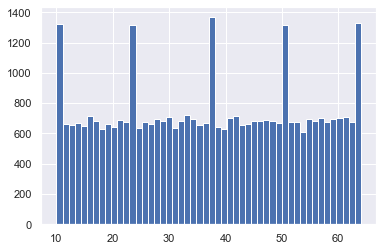

In [15]:
# graphical represntaion of univariate variable
train['age'].hist(bins=50);

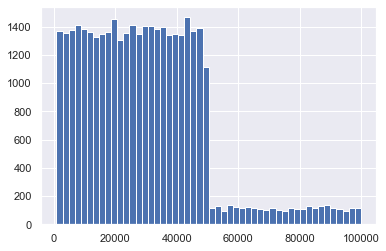

In [16]:
train['avg_transaction_value'].hist(bins=50);

In [17]:
# For Continuous variable Univariate Analysis

def plot_conti(data,feature):
    size=len(feature)
    plt.figure(figsize=(7*size,6),dpi=100)
    
    # looping for each variable
    
    for j,i in enumerate(feature):
        minimum=data[i].min()
        maximum= data[i].max()
        rang= data[i].max()-data[i].min()
        std_dev= data[i].std()
        mean= data[i].mean()
        median=data[i].median()
        skew= data[i].skew()
        kurto= data[i].kurtosis()
        
        # calculating Points of standard deviation
        points= mean-std_dev, mean+std_dev
        
        #ploting the variables
        
        plt.subplot(1,size,j+1)
        sns.kdeplot(data[i],shade=True, color='LightGreen')
        sns.lineplot(points,[0,0],color='black',label='std_dev')
        sns.scatterplot([minimum,maximum],[0,0],color='orange',label='Min/Max')
        sns.scatterplot([mean],[0],color='red',label='mean')
        sns.scatterplot([median],[0],color='blue',label='median')
        plt.xlabel('{}'.format(i),fontsize=10)
        plt.ylabel('density')
        plt.title('std_dev={}; kurtosis={};\n skew={}; rang={};\n mean={}; median={}'.format(round(points[0],2),
                                                                                             round(points[1],2),
                                                                                             round(kurto,2),
                                                                                             round(skew,2),
                                                                                             round(minimum,2),
                                                                                             round(maximum,2),
                                                                                             round(rang,2),
                                                                                            round(mean,2),
                                                                                            round(median,2)))

In [18]:
lst=['avg_transaction_value','points_in_wallet','age','days_since_last_login']

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\l

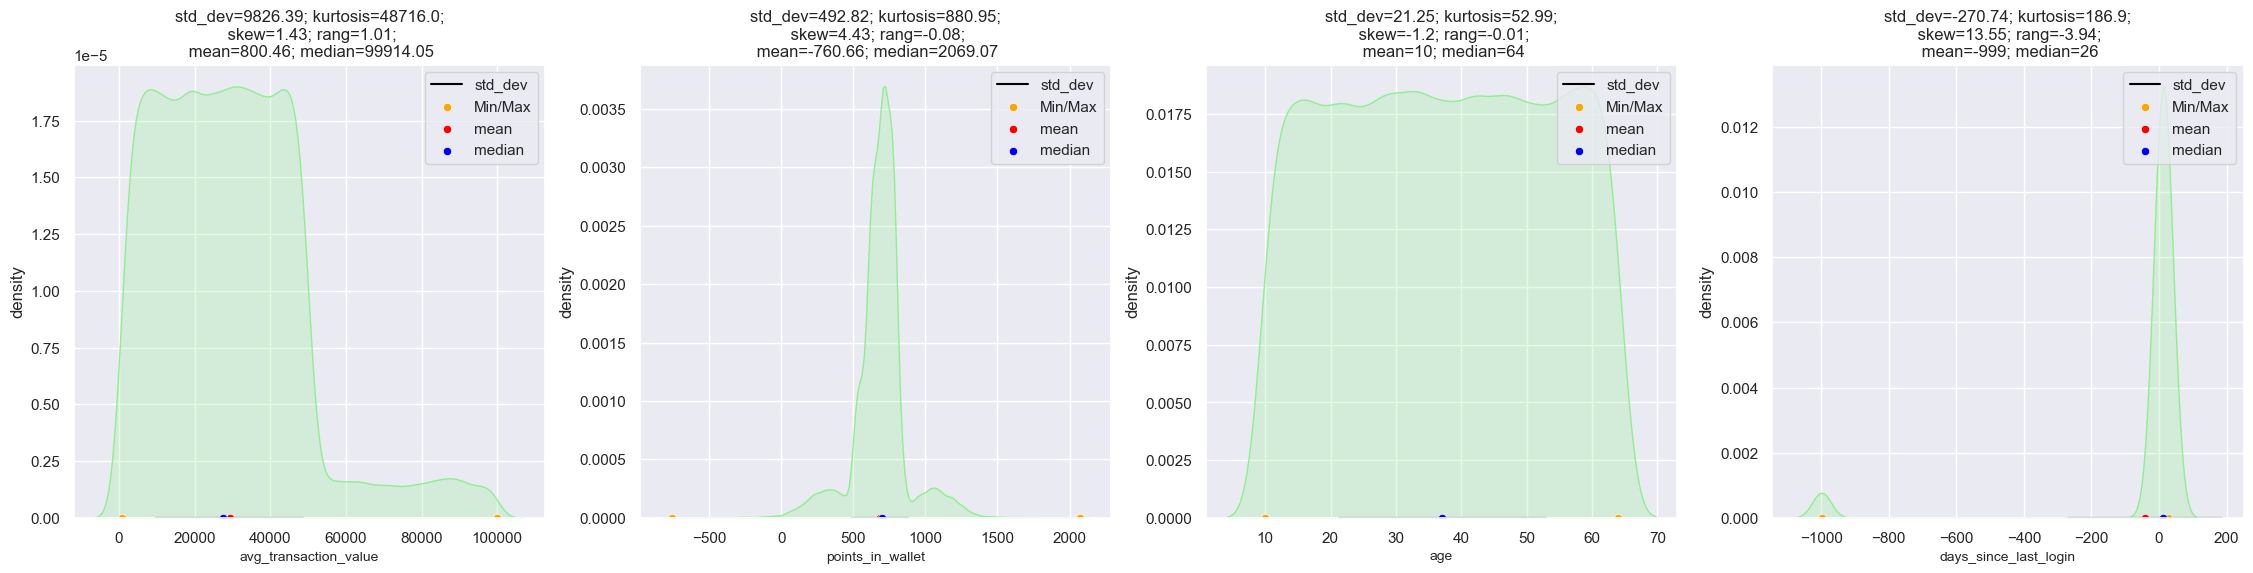

In [19]:
plot_conti(train,lst)

In [20]:
# AS we seen that we have negative values in the avg_transection_value, points in wallet and days since last login

In [21]:
# univariate analysis categorical values

def cat_plot(data,var_group):
    
    size= len(var_group)
    plt.figure(figsize=(8*size,7),dpi=100)
    
    #for every variable
    
    for j,i in enumerate(var_group):
        name_counts= data[i].value_counts(normalize=True)
        nunique= data[i].unique()
        
        # plotting the variable with information
        
        plt.subplot(1,size,j+1)
        graph2=sns.countplot(y=i,data=data,order=data[i].value_counts().index,palette='Set2')
        
        for p in graph2.patches:
            graph2.annotate(s='{:0f}'.format(p.get_width()),xy=(p.get_width()+0.1,p.get_y()+0.7))
        plt.xlabel('Fraction/percent',fontsize=10)
        plt.ylabel('{}'.format(i),fontsize=10)
        plt.title('n_unique={}\n value counts \n {};'.format(nunique,name_counts))

<ipython-input-21-953c79741d4c>:20: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  graph2.annotate(s='{:0f}'.format(p.get_width()),xy=(p.get_width()+0.1,p.get_y()+0.7))
<ipython-input-21-953c79741d4c>:20: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  graph2.annotate(s='{:0f}'.format(p.get_width()),xy=(p.get_width()+0.1,p.get_y()+0.7))


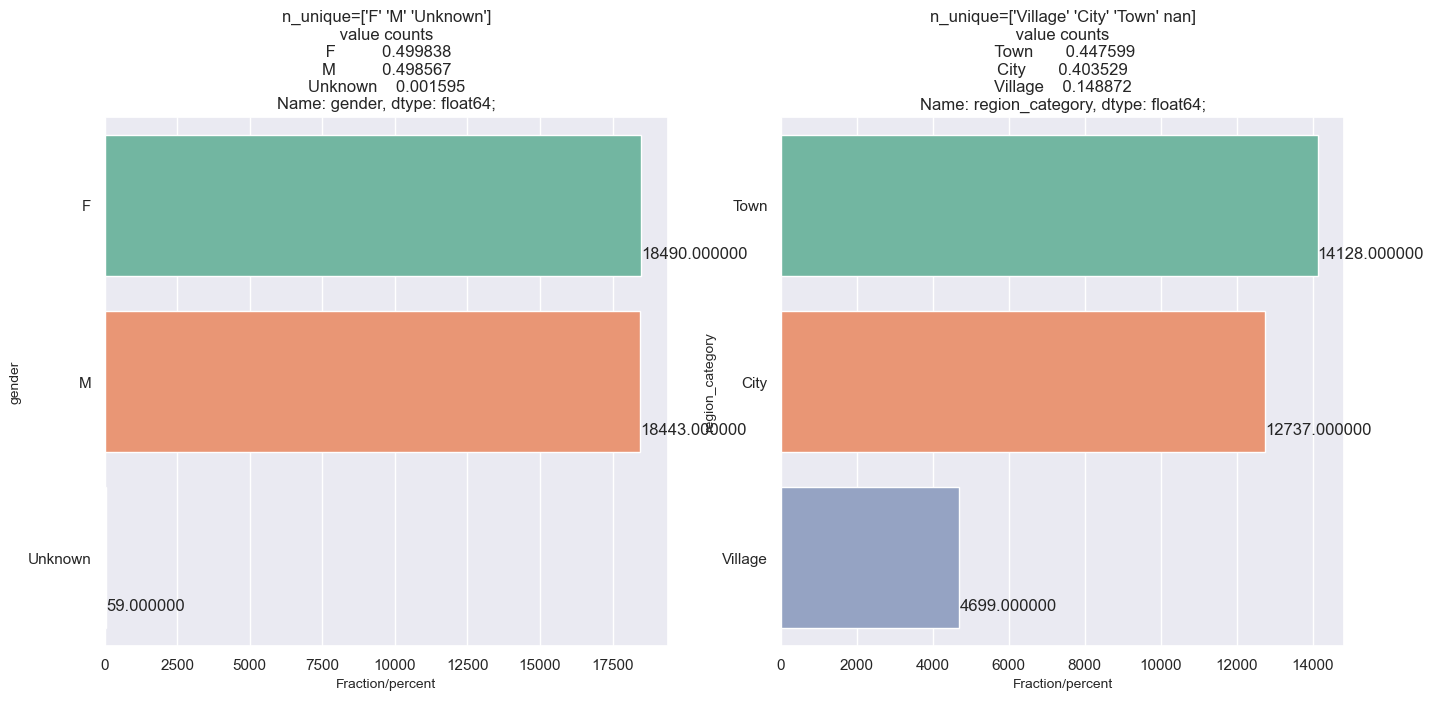

In [22]:
lst=['gender','region_category']
cat_plot(train,lst)

<ipython-input-21-953c79741d4c>:20: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  graph2.annotate(s='{:0f}'.format(p.get_width()),xy=(p.get_width()+0.1,p.get_y()+0.7))
<ipython-input-21-953c79741d4c>:20: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  graph2.annotate(s='{:0f}'.format(p.get_width()),xy=(p.get_width()+0.1,p.get_y()+0.7))


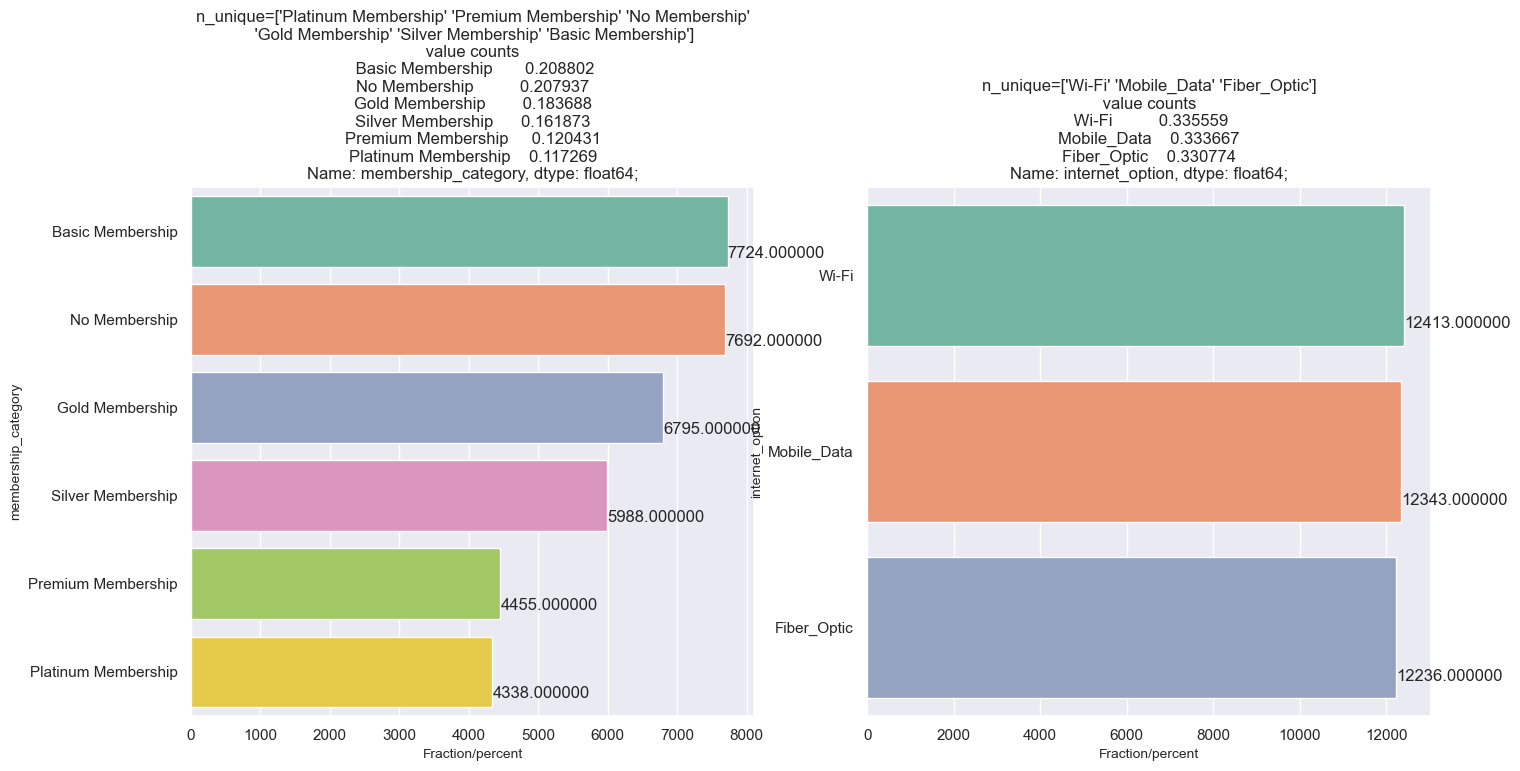

In [23]:
cat_plot(train,['membership_category','internet_option'])

<ipython-input-21-953c79741d4c>:20: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  graph2.annotate(s='{:0f}'.format(p.get_width()),xy=(p.get_width()+0.1,p.get_y()+0.7))
<ipython-input-21-953c79741d4c>:20: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  graph2.annotate(s='{:0f}'.format(p.get_width()),xy=(p.get_width()+0.1,p.get_y()+0.7))


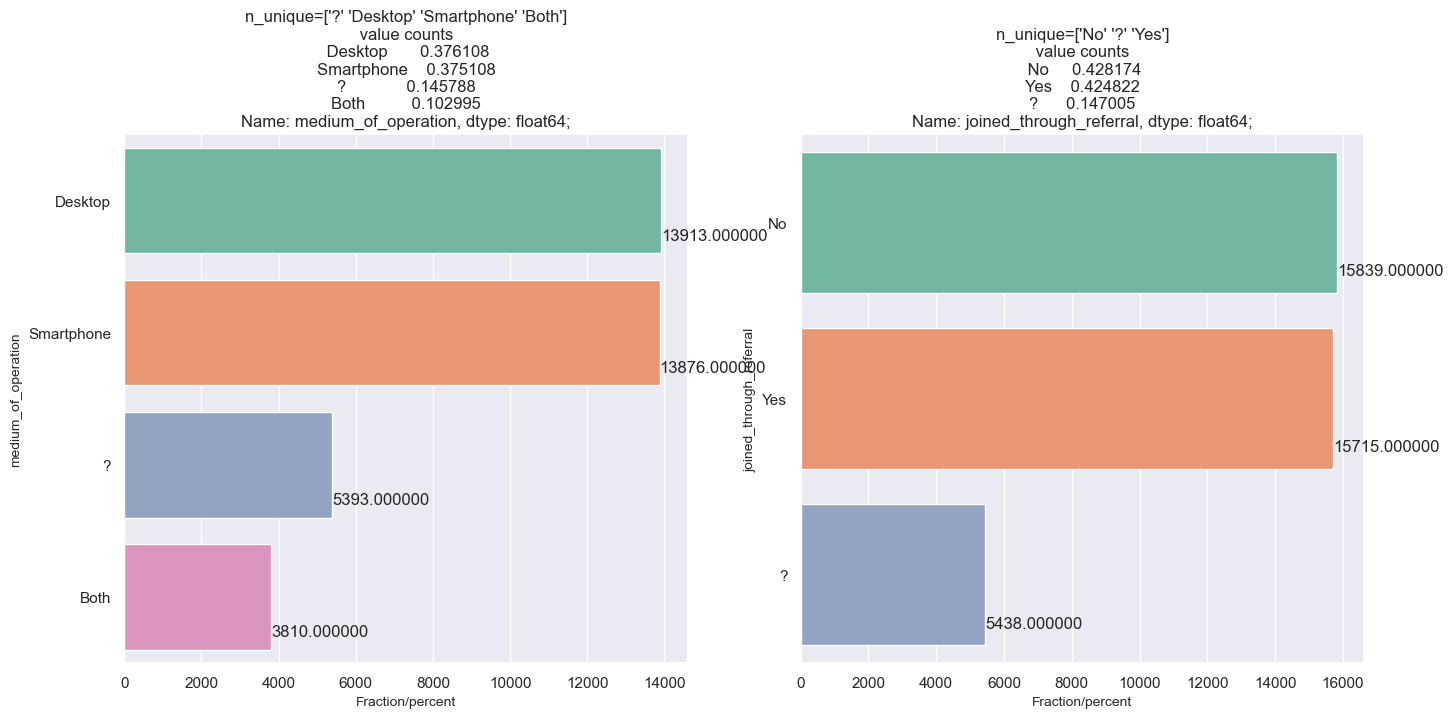

In [24]:
cat_plot(train,['medium_of_operation','joined_through_referral']) 

In [25]:
abc=pd.crosstab(train.medium_of_operation, [train.membership_category, train.region_category], rownames=['mediam_of_operation'])

In [26]:
abc

membership_category Basic Membership               Gold Membership       \
region_category                 City  Town Village            City Town   
mediam_of_operation                                                       
?                                411   403     148             325  384   
Both                             245   293      83             268  275   
Desktop                          971  1113     341             914  941   
Smartphone                      1067  1133     354             880  920   

membership_category         No Membership               Platinum Membership  \
region_category     Village          City  Town Village                City   
mediam_of_operation                                                           
?                       136           404   430     137                 204   
Both                     86           292   286      99                 172   
Desktop                 344           947  1110     344                 559   
Smartphone              315          1029  1115     347                 505   

membership_category              Premium Membership               \
region_category     Town Village               City Town Village   
mediam_of_operation                                                
?                    232      84                225  247      84   
Both                 203      60                171  163      61   
Desktop              641     235                576  609     242   
Smartphone           617     206                542  643     240   

membership_category Silver Membership               
region_category                  City Town Village  
mediam_of_operation                                 
?                                 265  332     101  
Both                              194  220      76  
Desktop                           751  902     281  
Smartphone                        820  916     295

# Data Prepration

In [27]:
train.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [28]:
train.head(2)

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1


In [29]:
#1. Dropping the unwanted columns from the data
train.drop(remove,axis=1,inplace=True)

In [30]:
#2. converting the columns to datetime
train['joining_date']= pd.to_datetime(train['joining_date'])
train['last_visit_time']= pd.to_datetime(train['last_visit_time'])

In [31]:
print('Last Visit time data type',train['last_visit_time'].dtype)
print('\n')
print('joining date data type',train['joining_date'].dtype)

Last Visit time data type datetime64[ns]


joining date data type datetime64[ns]


In [32]:
# creating Day,month and day of week columns
train['day']=train['joining_date'].dt.day
train['month']=train['joining_date'].dt.month
train['day_of_week']=train['joining_date'].dt.dayofweek

In [33]:
# creating hours and minutes columns
train['hours']= train['last_visit_time'].dt.hour
train['minute']=train['last_visit_time'].dt.minute

In [34]:
train.drop(['joining_date','last_visit_time'],axis=1,inplace=True)

In [35]:
# Missing Values ['region_category','preferred_offer_types','points_in_wallet']
train['region_category']=train['region_category'].fillna('Town')
train['preferred_offer_types']=train['preferred_offer_types'].fillna('Gift Vouchers/Coupons')
train['points_in_wallet']=train['points_in_wallet'].fillna(train['points_in_wallet'].median())

In [36]:
train['medium_of_operation']=train['medium_of_operation'].replace('?','Desktop')
train['gender']=train['gender'].replace('Unknown','M')
train['joined_through_referral']=train['joined_through_referral'].replace('?','Yes')

In [37]:
train['churn_risk_score']=train['churn_risk_score'].replace(-1,1)
train['avg_frequency_login_days']=train['avg_frequency_login_days'].replace('Error','0')

In [38]:
train['avg_frequency_login_days']=train['avg_frequency_login_days'].astype('float64')

In [39]:
train= train[(train['avg_frequency_login_days']>0)& (train['days_since_last_login']>0)]

In [40]:
shape_data(train)

The numbers of rows 31008 rows
the numbers of columns 25 columns


In [41]:
def corr(data,threshold):
    col_corr=set()
    corr_matrix=data.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname= corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [42]:
cor_feat= corr(train,0.80)
cor_feat

set()

# Data Modeling

In [43]:
target_col= train['churn_risk_score']
feature_col=train.drop('churn_risk_score',axis=1)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [45]:
list_ordinal=['feedback','complaint_status','internet_option','medium_of_operation','preferred_offer_types',
              'referral_id','region_category','membership_category']
list_one_hot=['gender','joined_through_referral','used_special_discount','offer_application_preference','past_complaint']

In [46]:
X_train,X_test,y_train,y_test= train_test_split(feature_col,target_col,test_size=0.2,random_state=0,shuffle=True)

In [47]:
ordinal_col= OrdinalEncoder()
X_train[list_ordinal]= ordinal_col.fit_transform(X_train[list_ordinal])
X_test[list_ordinal]=ordinal_col.fit_transform(X_test[list_ordinal])

<ipython-input-47-339e11911f42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[list_ordinal]= ordinal_col.fit_transform(X_train[list_ordinal])
C:\Users\asus\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-47-339e11911f42>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [48]:
X_train[list_one_hot]=pd.get_dummies(X_train[list_one_hot],drop_first=True)
X_test[list_one_hot]=pd.get_dummies(X_test[list_one_hot],drop_first=True)

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler= StandardScaler()

In [51]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [52]:
from catboost import CatBoostClassifier

In [53]:
from sklearn.metrics import f1_score

In [54]:
iteration=120
loss_fuction='MultiClassOneVsAll'
eta=0.3
depth=3
boosting_type='Ordered'
random_state=0

In [55]:
models= {'Catboost_r':CatBoostClassifier(iterations=iteration,loss_function=loss_fuction,eta=eta,depth=depth,boosting_type=boosting_type,random_state=random_state)}

train_score={}
test_score={}
y_train_pred={}
y_test_pred={}
f1_train={}
f1_test={}

for name,model in models.items():
    model.fit(X_train,y_train)
    train_score[name]=model.score(X_train,y_train)
    test_score[name]= model.score(X_test,y_test)
    y_train_pred[name]= model.predict(X_train)
    y_test_pred[name]= model.predict(X_test)
    f1_train[name]= 100*f1_score(y_train_pred[name],y_train.values,average='macro')
    f1_test[name]= 100*f1_score(y_test_pred[name],y_test.values,average='macro')

0:	learn: 0.5544905	total: 232ms	remaining: 27.6s
1:	learn: 0.4677808	total: 302ms	remaining: 17.8s
2:	learn: 0.4143324	total: 366ms	remaining: 14.3s
3:	learn: 0.3796471	total: 426ms	remaining: 12.4s
4:	learn: 0.3502506	total: 486ms	remaining: 11.2s
5:	learn: 0.3304053	total: 537ms	remaining: 10.2s
6:	learn: 0.3148999	total: 589ms	remaining: 9.5s
7:	learn: 0.3007320	total: 650ms	remaining: 9.11s
8:	learn: 0.2919284	total: 710ms	remaining: 8.76s
9:	learn: 0.2800146	total: 767ms	remaining: 8.44s
10:	learn: 0.2709571	total: 823ms	remaining: 8.15s
11:	learn: 0.2622480	total: 877ms	remaining: 7.89s
12:	learn: 0.2571131	total: 934ms	remaining: 7.68s
13:	learn: 0.2533578	total: 988ms	remaining: 7.48s
14:	learn: 0.2493671	total: 1.04s	remaining: 7.32s
15:	learn: 0.2461732	total: 1.11s	remaining: 7.2s
16:	learn: 0.2415994	total: 1.16s	remaining: 7.05s
17:	learn: 0.2371247	total: 1.21s	remaining: 6.88s
18:	learn: 0.2350742	total: 1.26s	remaining: 6.71s
19:	learn: 0.2319601	total: 1.31s	remaining

In [56]:
print('Train_score:',train_score)
print('\n')
print('F1_train:',f1_train)
print('\n')
print('Test_score:',test_score)
print('\n')
print('F1_test:',f1_test)

Train_score: {'Catboost_r': 0.7763643530297059}


F1_train: {'Catboost_r': 75.35457657111117}


Test_score: {'Catboost_r': 0.7639471138342471}


F1_test: {'Catboost_r': 74.31796321799577}


# Evaluating on Test Set

In [57]:
test= pd.read_csv('test.csv')

In [58]:
test.drop(remove,axis=1,inplace=True)

In [59]:
test['joining_date']= pd.to_datetime(test['joining_date'])
test['last_visit_time']= pd.to_datetime(test['last_visit_time'])
test['day']=test['joining_date'].dt.day
test['month']=test['joining_date'].dt.month
test['day_of_week']=test['joining_date'].dt.dayofweek

In [60]:
test['hours']= test['last_visit_time'].dt.hour
test['minute']=test['last_visit_time'].dt.minute
test.drop(['joining_date','last_visit_time'],axis=1,inplace=True)

In [61]:
test['region_category']=test['region_category'].fillna('Town')
test['preferred_offer_types']=test['preferred_offer_types'].fillna('Gift Vouchers/Coupons')
test['points_in_wallet']=test['points_in_wallet'].fillna(test['points_in_wallet'].median())

In [62]:
test['medium_of_operation']=test['medium_of_operation'].replace('?','Desktop')
test['gender']=test['gender'].replace('Unknown','M')
test['joined_through_referral']=test['joined_through_referral'].replace('?','Yes')

In [63]:
test['avg_frequency_login_days']=test['avg_frequency_login_days'].replace('Error','0')
test['avg_frequency_login_days']=test['avg_frequency_login_days'].astype('float64')

In [64]:
test[list_ordinal]= ordinal_col.fit_transform(test[list_ordinal])

In [65]:
test[list_one_hot]=pd.get_dummies(test[list_one_hot],drop_first=True)

In [66]:
test= scaler.transform(test)

In [67]:
models= CatBoostClassifier(iterations=iteration,loss_function=loss_fuction,eta=eta,depth=depth,boosting_type=boosting_type,random_state=random_state)
model.fit(X_train,y_train)

0:	learn: 0.5544905	total: 66.9ms	remaining: 7.96s
1:	learn: 0.4677808	total: 129ms	remaining: 7.6s
2:	learn: 0.4143324	total: 193ms	remaining: 7.53s
3:	learn: 0.3796471	total: 264ms	remaining: 7.64s
4:	learn: 0.3502506	total: 331ms	remaining: 7.6s
5:	learn: 0.3304053	total: 383ms	remaining: 7.27s
6:	learn: 0.3148999	total: 436ms	remaining: 7.04s
7:	learn: 0.3007320	total: 489ms	remaining: 6.85s
8:	learn: 0.2919284	total: 545ms	remaining: 6.72s
9:	learn: 0.2800146	total: 595ms	remaining: 6.55s
10:	learn: 0.2709571	total: 648ms	remaining: 6.42s
11:	learn: 0.2622480	total: 703ms	remaining: 6.33s
12:	learn: 0.2571131	total: 760ms	remaining: 6.25s
13:	learn: 0.2533578	total: 812ms	remaining: 6.14s
14:	learn: 0.2493671	total: 861ms	remaining: 6.03s
15:	learn: 0.2461732	total: 916ms	remaining: 5.95s
16:	learn: 0.2415994	total: 977ms	remaining: 5.92s
17:	learn: 0.2371247	total: 1.05s	remaining: 5.94s
18:	learn: 0.2350742	total: 1.1s	remaining: 5.85s
19:	learn: 0.2319601	total: 1.15s	remaining

In [68]:
y_test_pred= model.predict(test)

In [69]:
result= pd.read_csv('test.csv')

In [70]:
final_result= pd.DataFrame()
final_result['customer_id']= result['customer_id']
final_result['churn_risk_score']= y_test_pred

In [71]:
final_result

,customer_id,churn_risk_score
0,fffe43004900440031003700300030003400,3
1,fffe43004900440031003900370037003300,3
2,fffe43004900440034003800360037003000,3
3,fffe43004900440036003200370033003400,3
4,fffe43004900440035003000370031003900,5
...,...,...
19914,fffe43004900440035003600330037003800,3
19915,fffe43004900440032003900370037003100,5
19916,fffe43004900440036003100310036003700,5
19917,fffe43004900440034003200330033003600,4


In [72]:
final_result.to_csv('final.csv')

In [73]:
#75.96 0.2